In [5]:
# MP : Parcourir toutes les images (segmentées) et compter les pixel différentes du background (noir plantvillage, blanc flavia)
 
import os

# Chemin du dossier à analyser / d'images Plantvillage dataset1
# path = r"dataset/dataset/plantvillage/plantvillage dataset"
path_pv= "../dataset/plantvillage/data/plantvillage_5images/segmented"
#/workspaces/datasciencetest_reco_plante/dataset/dataset/plantvillage/plantvillage dataset/segmented


# Chemin du dossier à analyser / d'images Flavia dataset2
# path2 = r"dataset/flavia/flavia-dataset"
#path_flavia = "../dataset/flavia/flavia-dataset/Leaves"


#######################
# EXPLORATION DU JEU DE DONNEES
#######################
# Nombre total d’images
#######################

def lister_images(root_path):
    """
    Parcourt root_path et tous ses sous-dossiers via os.listdir,
    renvoie la liste des chemins complets des fichiers images.
    """
    images = []
    for nom in os.listdir(root_path):
        chemin = os.path.join(root_path, nom)
        # si chemin est un dossier : la fonction s'appelle sur elle meme
        if os.path.isdir(chemin):
            # on plonge dans le sous-dossier
            images += lister_images(chemin)
        # sinon c'est un fichier : conversion nom en minuscule et verification extension
        else:
            # on garde si c'est bien une image
            if nom.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
                # ajut du chemin complet à la liste images
                images.append(chemin)
    #retourne la liste images
    return images

# on applique la fonction lister_images au path du dataset plantvillage
pv_images     = lister_images(path_pv)
# on applique la fonction lister_images au path du dataset flavia
#flavia_images = lister_images(path_flavia)

# affichage du nombre d'element de chaque liste
print(f"PlantVillage : {len(pv_images)} images")
#print(f"Flavia      : {len(flavia_images)} images")

# vérification - decoupage de chaque liste  > on affiche es 5 premiers chemins 
print("\n5 premières PlantVillage :")
for img in pv_images[:5]:
    print(" ", img)

# print("\n5 premières Flavia :")
# for img in flavia_images[:5]:
#     print(" ", img)


PlantVillage : 190 images

5 premières PlantVillage :
  ../dataset/plantvillage/data/plantvillage_5images/segmented/Blueberry___healthy/013ffdc5-cbd1-4202-b0f1-8fd7c1ffc0b8___RS_HL 5120_final_masked.jpg
  ../dataset/plantvillage/data/plantvillage_5images/segmented/Blueberry___healthy/0137389a-9b78-4a94-afdb-c2b50861f89c___RS_HL 2347_final_masked.jpg
  ../dataset/plantvillage/data/plantvillage_5images/segmented/Blueberry___healthy/008c85d0-a954-4127-bd26-861dc8a1e6ff___RS_HL 2431_final_masked.jpg
  ../dataset/plantvillage/data/plantvillage_5images/segmented/Blueberry___healthy/011405e4-a92a-44b6-9f04-10fec28d93f5___RS_HL 2311_final_masked.jpg
  ../dataset/plantvillage/data/plantvillage_5images/segmented/Blueberry___healthy/00fee259-67b7-4dd7-8b36-12503bbdba14___RS_HL 2681_final_masked.jpg


In [9]:

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
def compute_background_ratio(img_path: Path, bg_color: int) -> float:
    """
    Charge une image en niveaux de gris, compte la proportion de pixels
    == bg_color (0 pour noir, 255 pour blanc) par rapport au total.
    """
    img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Impossible de charger l'image {img_path}")
    total = img.size
    bg_pixels = np.count_nonzero(img == bg_color)
    return bg_pixels / total

def analyze_dataset(image_paths, bg_color, label):
    """
    Pour une liste de chemins d'images, calcule les ratios de fond,
    construit un DataFrame et trace un histogramme.
    """
    ratios = []
    for p in image_paths:
        try:
            r = compute_background_ratio(p, bg_color)
            ratios.append({"dataset": label, "path": str(p), "bg_ratio": r})
        except Exception as e:
            print(f" Erreur sur {p.name}: {e}")

    df = pd.DataFrame(ratios)

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# transformation des paths qui sont des string en Path
path_pv     = Path("../dataset/plantvillage/data/plantvillage_5images/segmented")
pv_images     = lister_images(path_pv)
#path_flavia = Path("../dataset/flavia/flavia-dataset/Leaves")


In [ ]:

# !pip install --quiet opencv-python
# !pip install --quiet matplotlib

In [10]:


# -----------------------------------------------------------------------------
# FONCTION DE CALCUL DU RATIO -  GESTION DES IMAGES CORROMPUES 
# -----------------------------------------------------------------------------
def compute_background_ratio(img_path: Path, bg_color: int) -> float:
    """
    Charge une image en niveaux de gris, compte la proportion de pixels
    == bg_color (0 pour noir, 255 pour blanc) par rapport au total.
    Retourne None si l'image n'a pas pu être chargée.
    """
    img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
    # si openCV ne parvient pas à charger le fichier imread() renvoi None > dans ce cas on intercepte pour eviter le plantage
    if img is None:
        return None
    # nombre total de pixels (largeur × hauteur)
    total = img.size
    # création d'un tableau de booléens où chaque pixel vaut True si sa valeur est égale à bg_color, puis fait la somme ==> c’est le nombre de pixels de fond
    bg_pixels = int((img == bg_color).sum())
    # retourne proportion de pixels de fond par rapport au total
    return bg_pixels / total

def analyze_dataset(image_paths, bg_color, label):
    """
    Pour une liste de chemins d'images, calcule les ratios de fond,
    construit un DataFrame et trace un histogramme.
    Ignore et compte les images corrompues.
    """
    # records : liste vide qui sera ensuite pour chaque image valide complétée par un dictionnaire { "dataset":…, "path":…, "bg_ratio":…, "fg_ratio":… }
    records = []
    # compteur des images non lisibles (None)
    n_skipped = 0

    # image_paths = liste de chemins
    for p in image_paths:
        # renvoi un flottant (ratio du fond) ou None
        r = compute_background_ratio(p, bg_color)
        if r is None:
            n_skipped += 1
        else:
            records.append({"dataset": label, "path": str(p), "bg_ratio": r, "fg_ratio": 1-r})

    # conversion de la liste de dictionnaires en DataFrame panda
    df = pd.DataFrame(records)
    print(f"{label} : {len(df)} images analysées, {n_skipped} skippées.")

    if df.empty:
        print(f" Aucun ratio calculé pour {label}, Problème de chemins ?")
        return df, df

    # Histogramme
    plt.figure(figsize=(8,4))
    plt.hist(df["bg_ratio"], bins=50, edgecolor="k")
    plt.title(f"Distribution du ratio de fond — {label}")
    plt.xlabel("Ratio de pixels de fond (bg)")
    plt.ylabel("Nombre d'images")
    plt.tight_layout()
    plt.show()

    # Outliers
    low, high = 0.05, 0.95
    # filtrage dataframe pour fne garder que les extrêmes
    out = df[(df["bg_ratio"] < low) | (df["bg_ratio"] > high)]
    print(f"\n Outliers {label} : {len(out)} images")
    # si out n’est pas vide/ s'il y a des outliers à afficher : 
    if not out.empty:
        print(out[["path","bg_ratio","fg_ratio"]].head(10).to_string(index=False))

    return df, out


PlantVillage : 190 images analysées, 0 skippées.


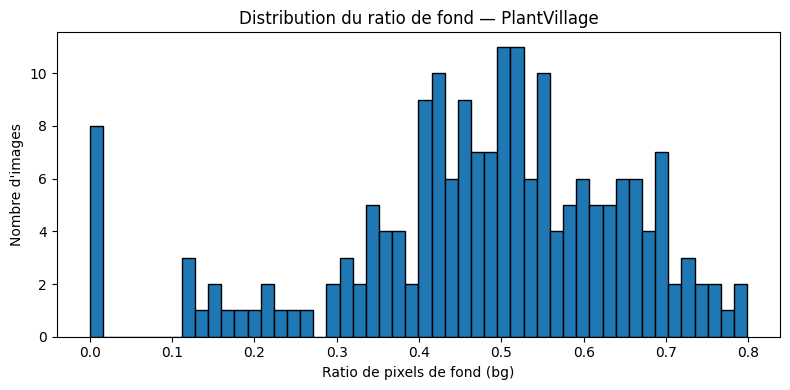


 Outliers PlantVillage : 8 images
                                                                                                                                                                               path  bg_ratio  fg_ratio
                      ../dataset/plantvillage/data/plantvillage_5images/segmented/Strawberry___Leaf_scorch/01b7dc2e-af4a-4708-a6ea-4cb19d6f167c___RS_L.Scorch 0072_final_masked.jpg  0.012604  0.987396
                      ../dataset/plantvillage/data/plantvillage_5images/segmented/Corn_(maize)___healthy/00665f92-adb0-41eb-bba7-9eeadecfe10e___R.S_HL 8325 copy 2_final_masked.jpg  0.000000  1.000000
                        ../dataset/plantvillage/data/plantvillage_5images/segmented/Corn_(maize)___healthy/01c3bf88-d315-42a3-8fa1-fc80a05c97f1___R.S_HL 8189 copy_final_masked.jpg  0.000000  1.000000
                        ../dataset/plantvillage/data/plantvillage_5images/segmented/Corn_(maize)___healthy/028ed539-32f5-4540-a6af-466179837de9___R.S_HL 8212 copy_fi

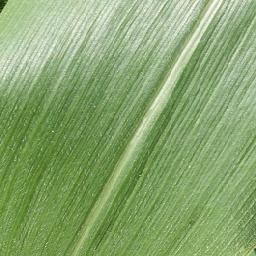

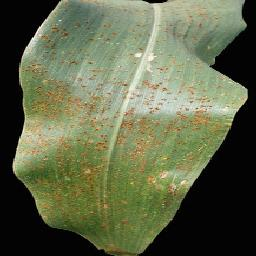

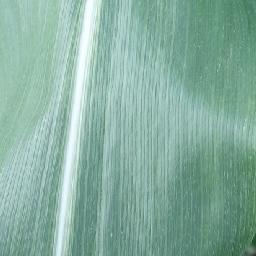

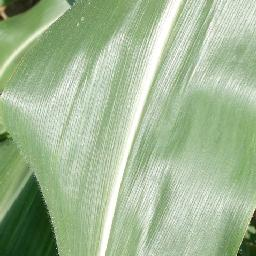

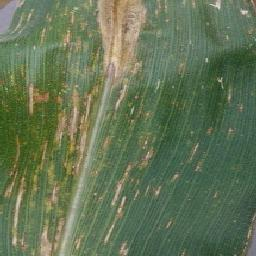

In [19]:
from PIL import Image
# -----------------------------------------------------------------------------
# LISTER LES IMAGES
# -----------------------------------------------------------------------------

#flavia_images = lister_images(path_flavia)

# -----------------------------------------------------------------------------
# LANCEMENT DE L'ANALYSE
# -----------------------------------------------------------------------------
# PlantVillage : fond noir bg_color=0
df_pv, out_pv         = analyze_dataset(pv_images,     bg_color=0,   label="PlantVillage")
# flavia : fond blanc bg_color=255
#df_flavia, out_flavia = analyze_dataset(flavia_images, bg_color=255, label="Flavia")





print('Pour le jeu de données flavia la majeure partie des images a un ratio de fond (pixels blancs) entre ~40 % et ~90 %, ')
print('ce qui correspond à un découpage "normal" : la feuille occupe donc entre 10 % et 60 % de la surface.')
print('Les images avec bg_ratio < 0.05 sont quasiment sans fond blanc : ça veut dire que la feuille couvre plus de 95 % de l’image.') 
print('Des gros plans trop serrés, ou des découpages mal centrés?')
print('Celles avec bg_ratio > 0.95 (barre tout à droite) sont l’inverse : moins de 5 % de feuille et donc beaucoup de blanc') 
print('Feuille  ridiculement petite, masque  corrompu / absent (image quasi vide)?')


# Affichage de quelques outlier pour vérifier :
# bg_ratio < 0.05
# for p in df_flavia[df_flavia.bg_ratio < 0.05].path.sample(5):
#     display(Image.open(p))  


# bg_ratio > 0.95
# for p in df_pv[df_pv.bg_ratio > 0.95].path.sample(5):
#     display(Image.open(p))


# subset = df_pv[df_pv.bg_ratio > 0.95]

# if not subset.empty:
#     for p in subset.path.sample(min(5, len(subset))):
#         display(Image.open(p))
# else:
#     print("Aucune image avec bg_ratio > 0.95")

def afficher_exemples(df, condition, n=5, description=""):
    subset = df[condition]
    if not subset.empty:
        print(f"{description} ({len(subset)} images)")
        for p in subset.path.sample(min(n, len(subset))):
            display(Image.open(p))
    else:
        print(f"Aucune image trouvée pour : {description}")
    
afficher_exemples(df_pv, df_pv.bg_ratio > 0.95, description="Fond quasi vide (bg_ratio > 0.95)")
afficher_exemples(df_pv, df_pv.bg_ratio < 0.05, description="Feuille très grande (bg_ratio < 0.05)")
